In [66]:
### Sri Balaji Muruganandam
### AAAMLP Book - Supervised and unsupervised chapter (Abhishek Thagur Book)
### t-SNE (unsupervised ?)
### Notebook - 1

In [67]:
"""
References:
(Important) - https://scikit-learn.org/stable/modules/manifold.html
https://docs.w3cub.com/scikit_learn/modules/generated/sklearn.datasets.load_digits
https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py
"""

'\nReferences:\nhttps://scikit-learn.org/stable/modules/manifold.html\nhttps://docs.w3cub.com/scikit_learn/modules/generated/sklearn.datasets.load_digits\nhttps://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py\n\n\n'

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
from sklearn import datasets  ## This contains existing datasets
from sklearn import manifold  ## 

In [70]:
### I browsed this code as AT code is too old
dat,target = datasets.load_digits(return_X_y=True)
print(dat.data.shape)

(1797, 64)


In [71]:
print("data", dat)
print("target",target)

data [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
target [0 1 2 ... 8 9 8]


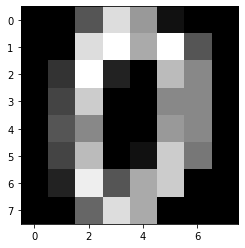

In [72]:
### The input data is flattened so I am reshapping it to visualize it
first_image = dat[0,:].reshape(8,8)
plt.imshow(first_image, cmap = "gray")
plt.show()

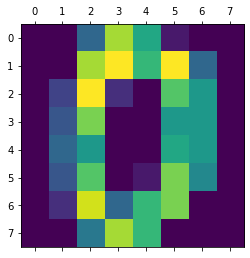

In [73]:
plt.matshow(first_image)
plt.show()

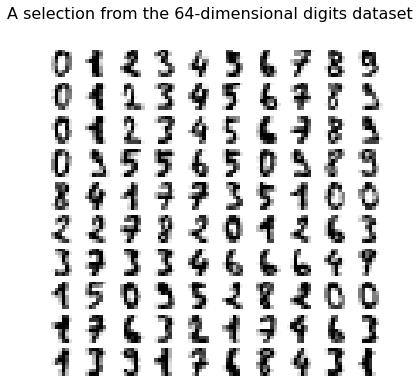

In [74]:
### Found it on official documentation (in reference)
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(dat[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [75]:
### Embedding the data into 2 dimensional space to visualize it
### n_component = dimension of embedded space
### There are many hyperparameters involved - experiment with it
### Remember T-SNE is a Stochastic algorithm

tsne = manifold.TSNE(n_components = 2, random_state = 23)
transformed_data = tsne.fit_transform(dat)   ## provide a few samples alone if needed eg.dat[:100,:]

/home/sribalaji21/Downloads/ENTER/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/sribalaji21/Downloads/ENTER/envs/ml/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [76]:
print(type(transformed_data))
print("Actual shape of data",dat.shape)
print("Transformed shape of data",transformed_data.shape)

### 64 dimensional data is changed into 2 dimensional data

<class 'numpy.ndarray'>
Actual shape of data (1797, 64)
Transformed shape of data (1797, 2)


In [77]:
### Converting transformed data into dataframe along with the target as last column
### X and Y are two components from t-SNE
dat_df = pd.DataFrame(np.column_stack((transformed_data,target)),columns=["X","Y","labels"])

In [78]:
## Converting labels column from float to int
dat_df.labels = dat_df.labels.astype(int)
dat_df.head(5)

,X,Y,labels
0,-1.348136,-66.019348,0
1,0.733856,-10.019403,1
2,-16.014900,8.596289,2
3,-13.243759,39.779278,3
4,17.869492,-31.740887,4


/home/sribalaji21/Downloads/ENTER/envs/ml/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


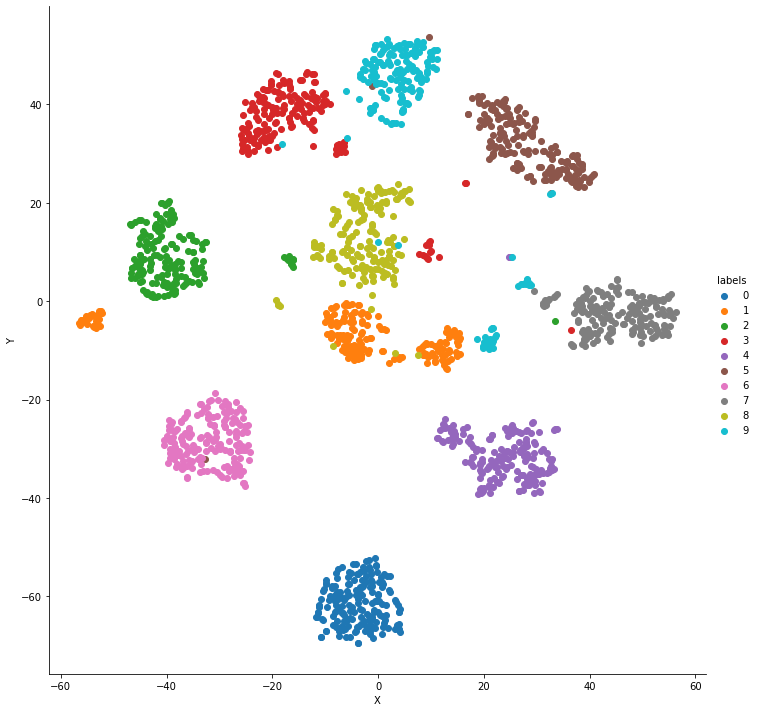

In [81]:
### Plotting the transformed data using seaborn and matplotlib
grid = sns.FacetGrid(dat_df,hue="labels",size=10)
grid.map(plt.scatter,"X","Y").add_legend()

In [ ]:
"""
FacetGrid class helps in visualizing distribution of one variable as well as the 
relationship between multiple variables separately within subsets of your dataset 
using multiple panels.

.map --> Apply a plotting function to each facet’s subset of the data.
"""

In [ ]:
"""
We already know MNIST dataset is a supervised classification problem but 
we converted it into unsupervised to check if it gives good results, yes we got in this case
By decomposition of t-SNE we got a good result
"""

### Results will be even better if we use classification algorithms